In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
style.use("fivethirtyeight")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn import datasets

In [3]:
dataset=datasets.load_iris()

In [4]:
columns=dataset["target_names"]
columns

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris_data=pd.DataFrame(dataset["data"][:,0:3],columns=columns)
iris_data["target"]=dataset["target"]
iris_data.head()

,setosa,versicolor,virginica,target
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0


In [6]:
iris_data.isnull().sum()

setosa        0
versicolor    0
virginica     0
target        0
dtype: int64

In [7]:
iris_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
setosa,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
versicolor,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
virginica,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [8]:
iris_data.corr()

,setosa,versicolor,virginica,target
setosa,1.000000,-0.117570,0.871754,0.782561
versicolor,-0.117570,1.000000,-0.428440,-0.426658
virginica,0.871754,-0.428440,1.000000,0.949035
target,0.782561,-0.426658,0.949035,1.000000


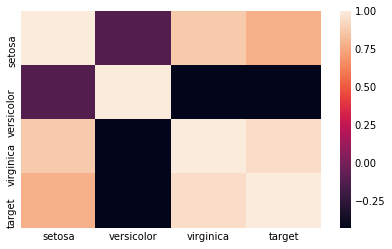

In [9]:
sns.heatmap(iris_data.corr())

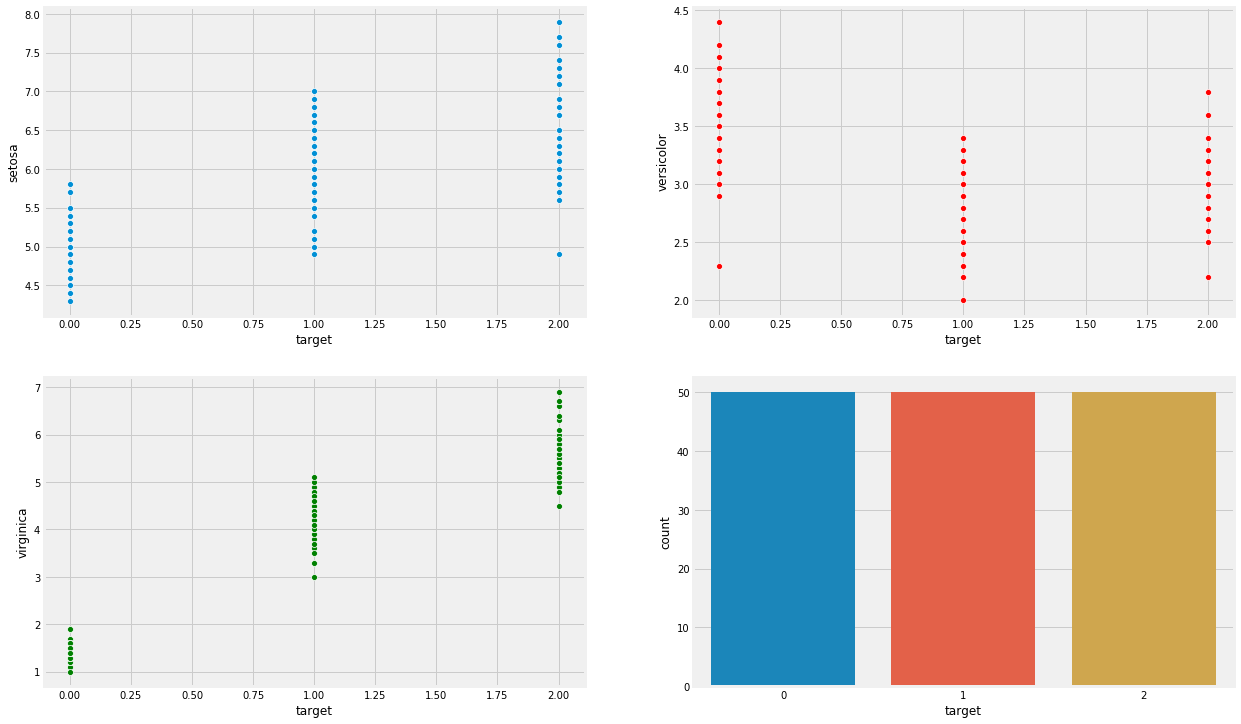

In [10]:
fig=plt.figure(figsize=(19,12.5))
fig.add_subplot(2,2,1)
sns.scatterplot(x="target",y="setosa",data=iris_data)
fig.add_subplot(2,2,2)
sns.scatterplot(x="target",y="versicolor",data=iris_data,color="r")
fig.add_subplot(2,2,3)
sns.scatterplot(x="target",y="virginica",data=iris_data,color="g")
fig.add_subplot(2,2,4)
sns.countplot(x="target",data=iris_data)

[(0, 10)]

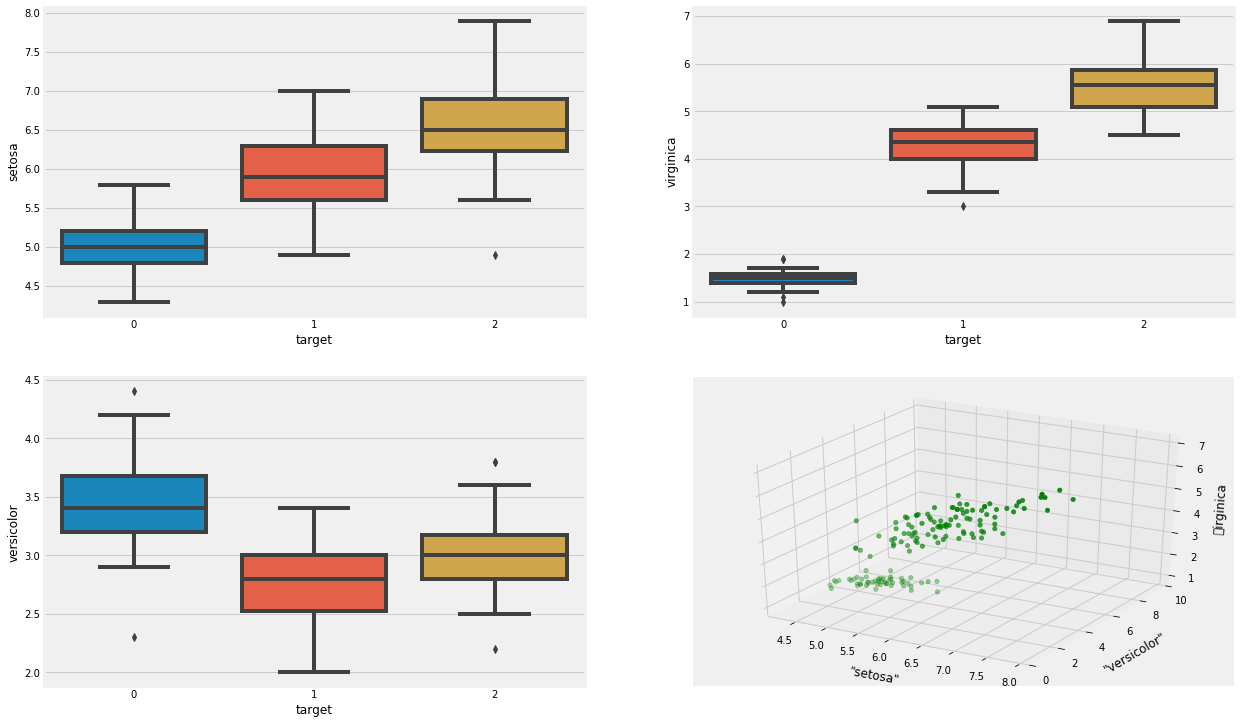

In [11]:
fig=plt.figure(figsize=(19,12.5))
fig.add_subplot(2,2,1)
sns.boxplot(x="target",y="setosa",data=iris_data)
fig.add_subplot(2,2,2)
sns.boxplot(x="target",y="virginica",data=iris_data)
fig.add_subplot(2,2,3)
sns.boxplot(x="target",y="versicolor",data=iris_data)
ax=fig.add_subplot(2,2,4,projection='3d')
ax.scatter(iris_data["setosa"],iris_data["versicolor"],iris_data["virginica"],c="g")
ax.set(xlabel='\n"setosa"',ylabel='\n"versicolor"',zlabel='\virginica')
ax.set(ylim=[0,10])

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
x=np.array(iris_data.iloc[:,0:3].values)
y=np.array(iris_data["target"])
encoding=OneHotEncoder()
y=encoding.fit_transform(y.reshape(-1,1))
print(y[0:10].toarray())

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6)

In [15]:
def modelcreating(optimizer="adam",loss="categorical_crossentropy"):
    model=Sequential()
    model.add(Dense(15,input_dim=3,activation="relu"))
    model.add(Dense(6,activation="relu"))
    model.add(Dense(3,activation="softmax"))
    model.compile(loss=loss,optimizer=optimizer,metrics=["accuracy"])
    return model
callbacks=EarlyStopping(monitor="val_loss",mode="min",patience=25)

In [16]:
model=modelcreating()
model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
         epochs=300,batch_size=20,verbose=1,
         callbacks=[callbacks])

Train on 112 samples, validate on 38 samples
Epoch 1/300
112/112 [==============================] - 0s 2ms/sample - loss: 1.1155 - accuracy: 0.6607 - val_loss: 1.0249 - val_accuracy: 0.6842
Epoch 2/300
112/112 [==============================] - 0s 107us/sample - loss: 1.0561 - accuracy: 0.6607 - val_loss: 1.0083 - val_accuracy: 0.6842
Epoch 3/300
112/112 [==============================] - 0s 116us/sample - loss: 1.0329 - accuracy: 0.6607 - val_loss: 1.0023 - val_accuracy: 0.6842
Epoch 4/300
112/112 [==============================] - 0s 116us/sample - loss: 1.0205 - accuracy: 0.6607 - val_loss: 0.9918 - val_accuracy: 0.6842
Epoch 5/300
112/112 [==============================] - 0s 107us/sample - loss: 1.0075 - accuracy: 0.6607 - val_loss: 0.9755 - val_accuracy: 0.6842
Epoch 6/300
112/112 [==============================] - 0s 116us/sample - loss: 0.9922 - accuracy: 0.6607 - val_loss: 0.9604 - val_accuracy: 0.6842
Epoch 7/300
112/112 [==============================] - 0s 142us/sample - lo

112/112 [==============================] - 0s 142us/sample - loss: 0.5363 - accuracy: 0.8929 - val_loss: 0.5175 - val_accuracy: 0.9474
Epoch 57/300
112/112 [==============================] - 0s 142us/sample - loss: 0.5280 - accuracy: 0.9018 - val_loss: 0.5021 - val_accuracy: 0.9474
Epoch 58/300
112/112 [==============================] - 0s 134us/sample - loss: 0.5181 - accuracy: 0.8929 - val_loss: 0.4974 - val_accuracy: 0.9474
Epoch 59/300
112/112 [==============================] - 0s 125us/sample - loss: 0.5089 - accuracy: 0.9018 - val_loss: 0.4883 - val_accuracy: 0.9474
Epoch 60/300
112/112 [==============================] - 0s 125us/sample - loss: 0.4994 - accuracy: 0.9107 - val_loss: 0.4758 - val_accuracy: 0.9474
Epoch 61/300
112/112 [==============================] - 0s 116us/sample - loss: 0.4930 - accuracy: 0.9107 - val_loss: 0.4723 - val_accuracy: 0.9474
Epoch 62/300
112/112 [==============================] - 0s 125us/sample - loss: 0.4816 - accuracy: 0.9286 - val_loss: 0.4606 

112/112 [==============================] - 0s 107us/sample - loss: 0.2321 - accuracy: 0.9286 - val_loss: 0.2236 - val_accuracy: 0.9737
Epoch 112/300
112/112 [==============================] - 0s 116us/sample - loss: 0.2304 - accuracy: 0.9375 - val_loss: 0.2152 - val_accuracy: 0.9474
Epoch 113/300
112/112 [==============================] - 0s 98us/sample - loss: 0.2283 - accuracy: 0.9375 - val_loss: 0.2130 - val_accuracy: 0.9737
Epoch 114/300
112/112 [==============================] - 0s 116us/sample - loss: 0.2241 - accuracy: 0.9375 - val_loss: 0.2164 - val_accuracy: 0.9737
Epoch 115/300
112/112 [==============================] - 0s 116us/sample - loss: 0.2241 - accuracy: 0.9286 - val_loss: 0.2213 - val_accuracy: 0.9737
Epoch 116/300
112/112 [==============================] - 0s 116us/sample - loss: 0.2216 - accuracy: 0.9375 - val_loss: 0.2118 - val_accuracy: 0.9737
Epoch 117/300
112/112 [==============================] - 0s 107us/sample - loss: 0.2178 - accuracy: 0.9375 - val_loss: 0.

112/112 [==============================] - 0s 116us/sample - loss: 0.1665 - accuracy: 0.9464 - val_loss: 0.1462 - val_accuracy: 0.9737
Epoch 167/300
112/112 [==============================] - 0s 107us/sample - loss: 0.1639 - accuracy: 0.9375 - val_loss: 0.1454 - val_accuracy: 0.9737
Epoch 168/300
112/112 [==============================] - 0s 107us/sample - loss: 0.1637 - accuracy: 0.9375 - val_loss: 0.1421 - val_accuracy: 0.9737
Epoch 169/300
112/112 [==============================] - 0s 116us/sample - loss: 0.1643 - accuracy: 0.9375 - val_loss: 0.1427 - val_accuracy: 0.9737
Epoch 170/300
112/112 [==============================] - 0s 116us/sample - loss: 0.1621 - accuracy: 0.9286 - val_loss: 0.1504 - val_accuracy: 0.9474
Epoch 171/300
112/112 [==============================] - 0s 115us/sample - loss: 0.1635 - accuracy: 0.9286 - val_loss: 0.1445 - val_accuracy: 0.9737
Epoch 172/300
112/112 [==============================] - 0s 107us/sample - loss: 0.1615 - accuracy: 0.9375 - val_loss: 0

112/112 [==============================] - 0s 116us/sample - loss: 0.1432 - accuracy: 0.9375 - val_loss: 0.1189 - val_accuracy: 0.9737
Epoch 222/300
112/112 [==============================] - 0s 116us/sample - loss: 0.1508 - accuracy: 0.9375 - val_loss: 0.1168 - val_accuracy: 0.9737
Epoch 223/300
112/112 [==============================] - 0s 116us/sample - loss: 0.1425 - accuracy: 0.9375 - val_loss: 0.1248 - val_accuracy: 0.9474
Epoch 224/300
112/112 [==============================] - 0s 107us/sample - loss: 0.1471 - accuracy: 0.9375 - val_loss: 0.1346 - val_accuracy: 0.9474
Epoch 225/300
112/112 [==============================] - 0s 98us/sample - loss: 0.1467 - accuracy: 0.9375 - val_loss: 0.1246 - val_accuracy: 0.9474
Epoch 226/300
112/112 [==============================] - 0s 124us/sample - loss: 0.1461 - accuracy: 0.9464 - val_loss: 0.1161 - val_accuracy: 0.9737
Epoch 227/300
112/112 [==============================] - 0s 134us/sample - loss: 0.1450 - accuracy: 0.9464 - val_loss: 0.

112/112 [==============================] - 0s 107us/sample - loss: 0.1368 - accuracy: 0.9375 - val_loss: 0.1079 - val_accuracy: 0.9737
Epoch 277/300
112/112 [==============================] - 0s 107us/sample - loss: 0.1360 - accuracy: 0.9554 - val_loss: 0.1125 - val_accuracy: 0.9474
Epoch 278/300
112/112 [==============================] - 0s 98us/sample - loss: 0.1377 - accuracy: 0.9286 - val_loss: 0.1086 - val_accuracy: 0.9737
Epoch 279/300
112/112 [==============================] - 0s 98us/sample - loss: 0.1359 - accuracy: 0.9375 - val_loss: 0.1145 - val_accuracy: 0.9474
Epoch 280/300
112/112 [==============================] - 0s 115us/sample - loss: 0.1380 - accuracy: 0.9375 - val_loss: 0.1154 - val_accuracy: 0.9474
Epoch 281/300
112/112 [==============================] - 0s 107us/sample - loss: 0.1374 - accuracy: 0.9286 - val_loss: 0.1064 - val_accuracy: 0.9737
Epoch 282/300
112/112 [==============================] - 0s 107us/sample - loss: 0.1351 - accuracy: 0.9375 - val_loss: 0.1

In [17]:
loss=pd.DataFrame(model.history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,1.115459,0.660714,1.024922,0.684211
1,1.056144,0.660714,1.008288,0.684211
2,1.032876,0.660714,1.002326,0.684211
3,1.020487,0.660714,0.991793,0.684211
4,1.007508,0.660714,0.975493,0.684211


<Figure size 720x432 with 0 Axes>

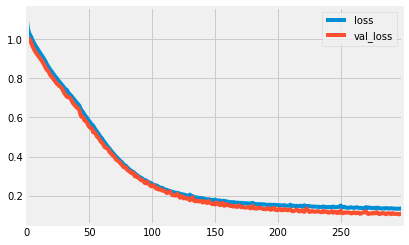

In [18]:
plt.figure(figsize=(10,6))
loss[["loss","val_loss"]].plot()

<Figure size 720x432 with 0 Axes>

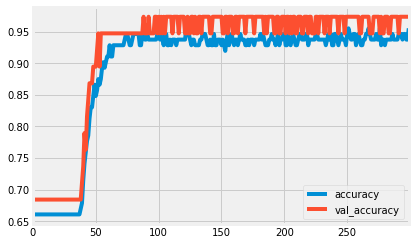

In [19]:
plt.figure(figsize=(10,6))
loss[["accuracy","val_accuracy"]].plot()

In [20]:
y_pred=model.predict_classes(x_test)
y_test_dummy=y_test.toarray()
y_test_dummy=np.argmax(y_test_dummy,axis=1)
y_test_dummy

array([0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2,
       0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2], dtype=int64)

In [21]:
# analysing the results
print(confusion_matrix(y_test_dummy,y_pred))
print(classification_report(y_test_dummy,y_pred))

[[12  0  0]
 [ 0 11  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        12
           2       0.93      1.00      0.97        14

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [22]:
scores=model.evaluate(x_test,y_test)
print(model.metrics_names[1],scores[1]*100)

38/38 [==============================] - 0s 131us/sample - loss: 0.1047 - accuracy: 0.9737
accuracy 97.36841917037964


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 21        
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
